# Linear models for classification #

Linear models are also extensively used for classification. Let’s look at binary classifi‐
cation first. In this case, a prediction is made using the following formula:
ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0
The formula looks very similar to the one for linear regression, but instead of just
returning the weighted sum of the features, 

***we threshold the predicted value at zero.***


**If the function is smaller than zero, we predict the class –1; if it is larger than zero, we predict the class +1. This prediction rule is common to all linear models for classification. Again, there are many different ways to find the coefficients (w) and the inter‐cept (b).**

For linear models for classification,
the decision boundary is a linear function of the input. In other words, a (binary) lin‐
ear classifier is a classifier that separates two classes using a line, a plane, or a hyper‐
plane. We will see examples of that in this section.


## Linear Classification Algorithms 
There are two type of linear classification Algorithm

### Logistic Regression
Logistic Regression is a classification algorithm implemented in `linear_model.LogisticRegression`. Despite its name, it's used for classification, not regression, and should not be confused with `LinearRegression`.

### Linear Support Vector Machines (Linear SVMs)
Linear Support Vector Machines, implemented in `svm.LinearSVC`, are another popular linear classification algorithm. SVC stands for Support Vector Classifier. Like Logistic Regression, it is used for classification tasks.

#### Application to Forge Dataset
These linear models can be applied to datasets such as the forge dataset, allowing visualization of the decision boundary determined by the linear models.


In [13]:
import sys
!{sys.executable} -m pip install numpy scikit-learn pandas matplotlib mglearn
import warnings 
warnings.filterwarnings("ignore")


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


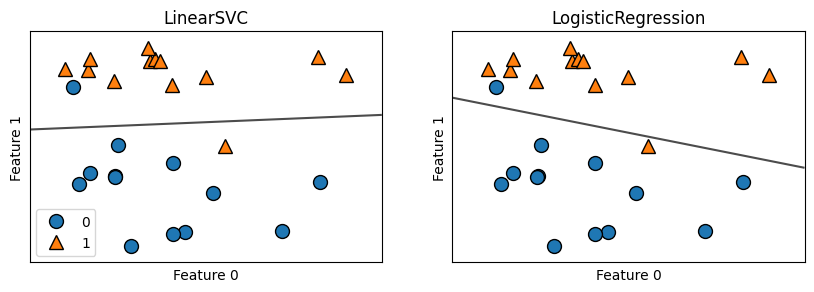

In [14]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import mglearn
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
 clf = model.fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
 ax=ax, alpha=.7)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{}".format(clf.__class__.__name__))
 ax.set_xlabel("Feature 0")
 ax.set_ylabel("Feature 1")
axes[0].legend()



In this figure, the x-axis represents the first feature, and the y-axis represents the second feature of the forge dataset. The decision boundaries of LinearSVC and LogisticRegression are depicted as straight lines, separating class 1 (top) from class 0 (bottom). Points above the line are classified as class 1, and those below as class 0. 

Both models exhibit similar decision boundaries, with two misclassified points. By default, 

#### both models apply L2 regularization, akin to Ridge regression

## L1 vs L2 Regularization

- **L1 Regularization (Lasso):**
  - *Purpose:* Encourages sparsity in feature selection, leading to some coefficients being exactly zero.
  - *Effect:* Produces sparse models by eliminating less important features.
  - *Use Case:* Ideal when there's a belief that many features are irrelevant or redundant.

- **L2 Regularization (Ridge):**
  - *Purpose:* Prevents overfitting by penalizing large coefficients, without forcing them to be exactly zero.
  - *Effect:* Shrinks all coefficients, allowing the model to use all features to some extent.
  - *Use Case:* Generally suitable when all features are potentially relevant.




***In summary, L1 regularization is suitable for feature selection, especially when only a subset of features is crucial, while L2 regularization is more appropriate for preventing overfitting when utilizing all features is desirable, but with controlled coefficients.***

=======================================================================================

For LogisticRegression and LinearSVC the trade-off parameter that determines the
strength of the regularization is called **C**, and 
higher values of C correspond to less Supervised regularization. In other words, 
##### when you use a high value for the parameter C, LogisticRegression and LinearSVC try to fit the training set as best as possible, 
##### while with low values of the parameter C, the models put more emphasis on finding a coefficient vector (w) that is close to zero.


=================================================================

There is another interesting aspect of how the parameter C acts. Using low values of C
will cause the algorithms to try to adjust to the “majority” of data points, while using
a higher value of C stresses the importance that each individual data point be classi‐
fied correctly. Here is an illustration using LinearSVC

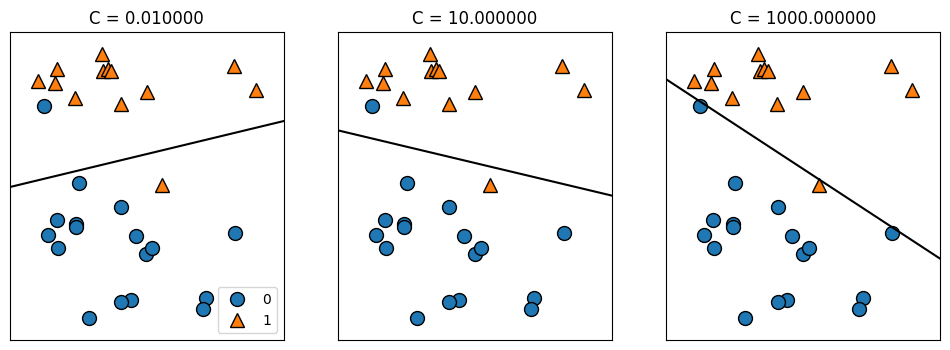

In [10]:
mglearn.plots.plot_linear_svc_regularization()


**Let’s analyze LinearLogistic in more detail on the Breast Cancer dataset:**

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Training set score: 0.944
Test set score: 0.965


The default value of C=1 provides quite good performance, with 95% accuracy on
both the training and the test set. But as training and test set performance are very
close, it is likely that we are underfitting. Let’s try to increase C to fit a more flexible
model:

In [16]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


Using C=100 results in higher training set accuracy, and also a slightly increased test
set accuracy, confirming our intuition that a more complex model should perform
better.


We can also investigate what happens if we use an even more regularized model than
the default of C=1, by setting C=0.01:


In [17]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


Finally, let’s look at the coefficients learned by the models with the three different set‐
tings of the regularization parameter C

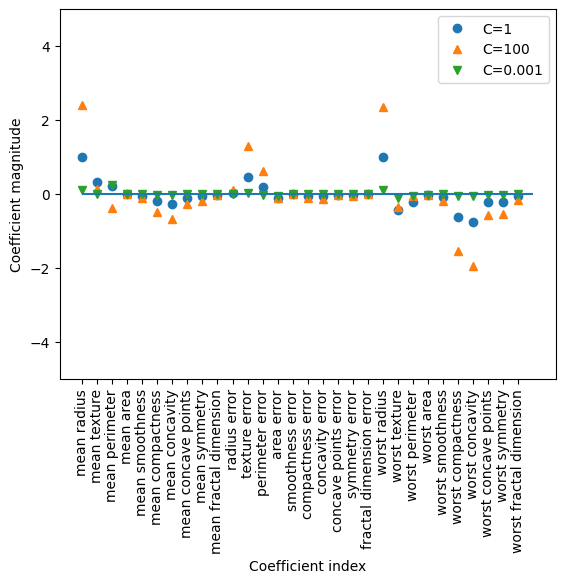

In [19]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()


## Impact of Regularization Strength (C) in Logistic Regression

When adjusting the regularization strength parameter (C) in Logistic Regression:

- **Moving Left on the Regularization Scale:**
  - *Effect:* Both training and test set accuracy decrease.
  - *Interpretation:* Underfitting increases as the model becomes more regularized.

- **L2 Regularization Effect:**
  - *Observation:* LogisticRegression applies L2 regularization by default.
  - *Result:* Coefficients are pushed toward zero, resembling the effect seen with Ridge regression.

- **Interpretation Challenge:**
  - *Insight:* Coefficients never become exactly zero due to regularization.
  - *Example:* Change in sign for the coefficient of "mean perimeter" depending on the regularization strength.
  - *Note:* Interpretations of coefficients in linear models should be approached cautiously, considering the impact of regularization.

Adjusting the regularization strength allows for a balance between fitting the training data well and avoiding overfitting. The change in coefficients highlights the nuanced interpretation of features in the model.


================================================================================================

If we desire a more interpretable model, using L1 regularization might help, as it lim‐
its the model to using only a few features. Here is the coefficient plot and classifica‐
tion accuracies for L1 regularization 

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


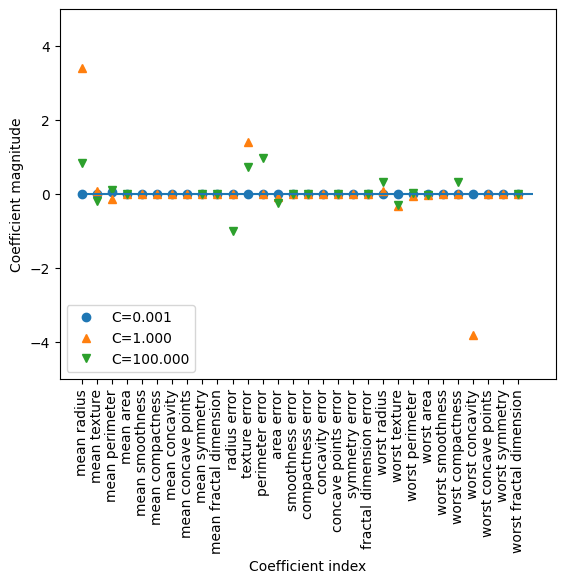

In [22]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver="liblinear").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)


In L1 regularization, as it encourages sparsity by driving some coefficients to exactly zero, it essentially performs automatic feature selection. The model becomes simpler with fewer significant features.

In L2 regularization, all features are considered, but they are penalized based on their magnitude. This helps prevent overfitting by controlling the size of the coefficients.

Choosing between L1 and L2 regularization depends on your specific problem and dataset. Here are a couple of considerations:

1. *Feature Importance:*
   - If you suspect that only a few features are crucial for your model's performance, L1 regularization (lasso) may be more appropriate as it tends to drive non-important features to zero.

2. *Model Stability:*
   - If you have many correlated features, L2 regularization (ridge) can be beneficial. It won't force coefficients to be exactly zero, providing a more stable solution.

To determine which one gives better results for your model, you might experiment with both and evaluate their performance using metrics like accuracy, precision, recall, or F1 score. Cross-validation can help in assessing how well the models generalize to new data.

It's often a bit of trial and error, and the choice may vary based on the specific characteristics of your dataset.